In [36]:
#!pip install tensorflow
#!pip install keras

In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM ,Dense ,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pickle

In [38]:
%matplotlib inline

In [39]:
df = pd.read_csv('Chad.csv')

In [40]:
df.sort_index(axis=0,inplace=True,ascending=False)

In [41]:
df,df.shape

(          Date   Open   High    low  Close   Volume
 3913  20031019   2991   2991   2900   2916  2000000
 3912  20031020   3061   3061   3061   3061  7500000
 3911  20031021   3214   3214   3214   3214  6000000
 3910  20031022   3374   3374   3374   3374  3000000
 3909  20031025   3542   3542   3542   3542  9327800
 ...        ...    ...    ...    ...    ...      ...
 4     20220205  30000  30240  29560  29610  5515311
 3     20220206  29950  29950  28210  29160  4915291
 2     20220207  29150  29870  29010  29200  1705522
 1     20220208  29690  29890  29030  29580  3800062
 0     20220209  30000  30000  29410  29620  1754238
 
 [3914 rows x 6 columns],
 (3914, 6))

In [42]:
data=df.iloc[:,1:2].values
data.shape

(3914, 1)

In [43]:
scaler=MinMaxScaler(feature_range=(0,1))

In [44]:
data_norm = scaler.fit_transform(data)

In [45]:
X=[]
y=[]
for i in range(60,data_norm.shape[0]):
    X.append(data_norm[i-60:i,0])
    y.append(data_norm[i,0])
X = np.array(X)
y = np.array(y).reshape(-1,1)

In [46]:
X.shape,y.shape

((3854, 60), (3854, 1))

In [47]:
n=int(X.shape[0]*0.9)
X_train,X_test,y_train,y_test=X[:n,:],X[n:,:],y[:n],y[n:]

In [48]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3468, 60), (3468, 1), (386, 60), (386, 1))

In [49]:
reg = Sequential()
reg.add(LSTM(units=64,return_sequences=True,input_shape=(X_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=64,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=64,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=64,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=64,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=64))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

In [50]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,y_train,epochs=2,batch_size=64)

Epoch 1/2
55/55 [==============================] - 20s 201ms/step - loss: 0.0061
Epoch 2/2
55/55 [==============================] - 12s 218ms/step - loss: 0.0023


In [51]:
y_pred_train=reg.predict(X_train)

In [52]:
print("R2 Score for traning: {:.2f}%".format(r2_score(y_train,y_pred_train)*100))

R2 Score for traning: 88.72%


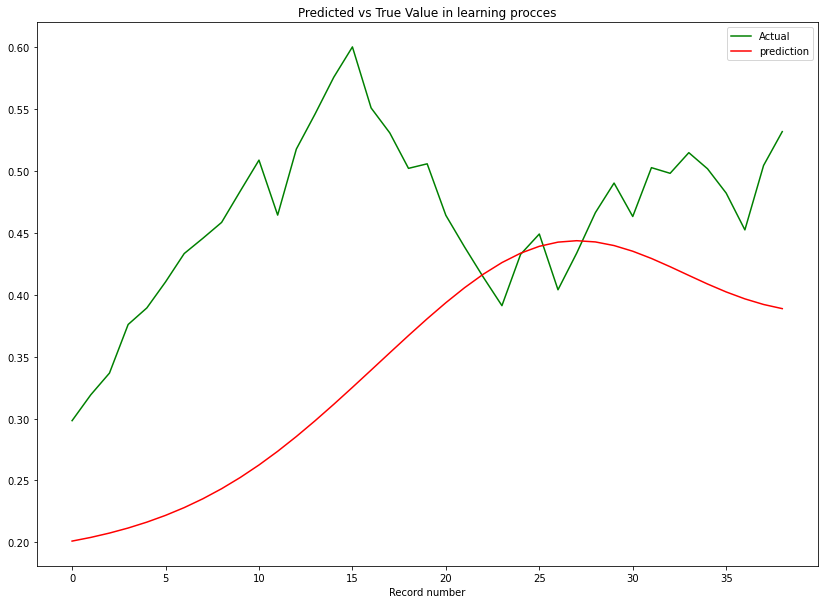

In [53]:
plt.figure(figsize=(14,10))
plt.plot(range(39),y_train[-40:-1], color = "green")
plt.plot(range(39),y_pred_train[-40:-1], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value in learning procces")
plt.xlabel("Record number")

plt.show()

In [54]:
y_pred=reg.predict(X_test)

In [55]:
y_pred.shape

(386, 1)

In [56]:
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))

R2 Score: -176.39%


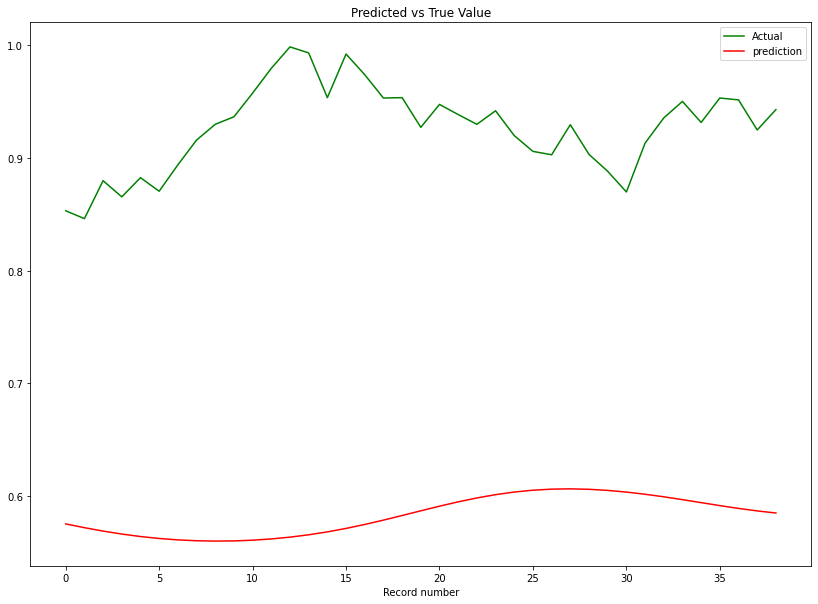

In [57]:
plt.figure(figsize=(14,10))
plt.plot(range(39),y_test[-40:-1], color = "green")
plt.plot(range(39),y_pred[-40:-1], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

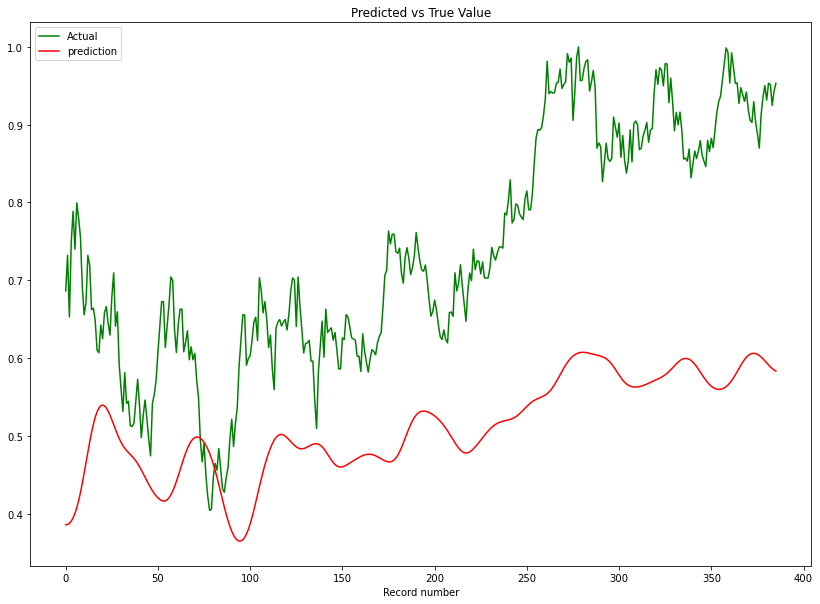

In [58]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test)),y_test, color = "green")
plt.plot(range(len(y_pred)),y_pred, color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

In [59]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X,y,epochs=30,batch_size=64)

Epoch 1/30
61/61 [==============================] - 22s 222ms/step - loss: 0.0039
Epoch 2/30
61/61 [==============================] - 14s 224ms/step - loss: 0.0031
Epoch 3/30
61/61 [==============================] - 14s 223ms/step - loss: 0.0027
Epoch 4/30
61/61 [==============================] - 14s 223ms/step - loss: 0.0023
Epoch 5/30
61/61 [==============================] - 14s 226ms/step - loss: 0.0021
Epoch 6/30
61/61 [==============================] - 14s 223ms/step - loss: 0.0025
Epoch 7/30
61/61 [==============================] - 14s 231ms/step - loss: 0.0018
Epoch 8/30
61/61 [==============================] - 14s 226ms/step - loss: 0.0016
Epoch 9/30
61/61 [==============================] - 14s 238ms/step - loss: 0.0016
Epoch 10/30
61/61 [==============================] - 14s 230ms/step - loss: 0.0016
Epoch 11/30
61/61 [==============================] - 14s 228ms/step - loss: 0.0015
Epoch 12/30
61/61 [==============================] - 14s 228ms/step - loss: 0.0014
Epoch 13/30
6

In [60]:
data_new=data_norm
for i in range(15):
    X_60 = data_new[-60:]
    X_60=np.reshape(X_60,(1,-1))
    y_pred=reg.predict(X_60)
    data_new=np.append(data_new,y_pred)

In [61]:
data_norm.shape,data_new.shape

((3914, 1), (3929,))

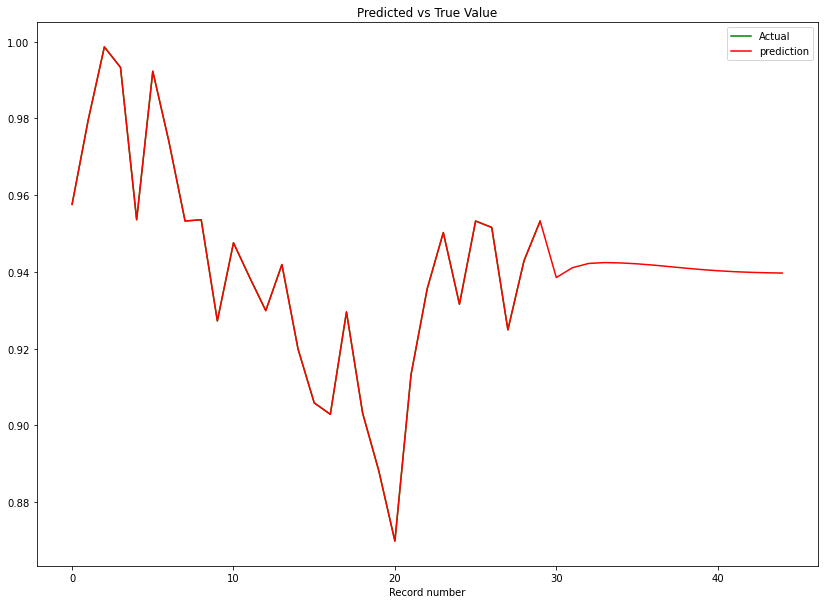

In [62]:
X1=data_norm[-30:]
X2=data_new[-45:]
plt.figure(figsize=(14,10))
plt.plot(range(len(X1)),X1, color = "green")
plt.plot(range(len(X2)),X2, color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

In [64]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(reg, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://ffeb50d5-87d9-482c-acf0-a79e03eace16/assets


INFO:tensorflow:Assets written to: ram://ffeb50d5-87d9-482c-acf0-a79e03eace16/assets


In [ ]:
#model = pickle.load(open(filename, 'rb'))